<a href="https://colab.research.google.com/github/Franrestrepo/ucc-data-mining/blob/master/Miner%C3%ADaDeDatos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Crime_Data_from_2020_to_Present_20241027.csv to Crime_Data_from_2020_to_Present_20241027.csv


In [27]:
#Punto 1
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['Crime_Data_from_2020_to_Present_20241027.csv']))
print(df.head())
print(df.info())

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM      1200     6   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0   Wilshire          784         1     510   
1    Central          182         1     330   
2  Southwest          356         1     480   
3   Van Nuys          964         1     343   
4  Hollywood          666         2     354   

                                Crm Cd Desc  ... Status   Status Desc  \
0                          VEHICLE - STOLEN  ...     AA  Adult Arrest   
1                     BURGLARY FROM VEHICLE  ...     IC   Invest Cont   
2                

In [18]:
#Punto 2

# Define los códigos de delito que quieres analizar (incluyendo el 110)
codigos_delito = [110, 330, 480, 343, 354, 250]

for codigo in codigos_delito:
  # Filtra el DataFrame para obtener solo los incidentes con el código de delito específico
  incidentes_codigo = df[df['Crm Cd 1'] == codigo]

  # Imprime el resultado
  print(f"Incidentes con código de delito {codigo}:")
  print(incidentes_codigo)
  print("\n")

Incidentes con código de delito 110:
            DR_NO               Date Rptd                DATE OCC  TIME OCC  \
5010    200100785  05/16/2020 12:00:00 AM  05/15/2020 12:00:00 AM      1945   
6515    201314412  07/24/2020 12:00:00 AM  07/23/2020 12:00:00 AM      2145   
7841    201214818  06/17/2020 12:00:00 AM  06/17/2020 12:00:00 AM        50   
7890    201113525  09/12/2020 12:00:00 AM  09/12/2020 12:00:00 AM      1200   
8425    201319978  11/15/2020 12:00:00 AM  11/15/2020 12:00:00 AM       150   
...           ...                     ...                     ...       ...   
982702  241806374  02/21/2024 12:00:00 AM  02/15/2024 12:00:00 AM       150   
983056  241211023  04/30/2024 12:00:00 AM  04/30/2024 12:00:00 AM      1410   
983107  241506464  02/23/2024 12:00:00 AM  02/20/2024 12:00:00 AM      1326   
984052  241811189  07/05/2024 12:00:00 AM  07/05/2024 12:00:00 AM        45   
984383  241509376  04/22/2024 12:00:00 AM  04/22/2024 12:00:00 AM       510   

        AREA  

In [28]:
#Punto 3
incidentes_por_area = df.groupby('AREA').size()
print(incidentes_por_area)

AREA
1     68166
2     46001
3     56259
4     36287
5     40603
6     51510
7     47272
8     44848
9     42059
10    41452
11    42050
12    61018
13    48422
14    58087
15    50197
16    32647
17    40985
18    49263
19    39572
20    49211
21    40591
dtype: int64


In [29]:
#Punto 4
delitos_por_genero = df['Vict Sex'].value_counts()
print(delitos_por_genero)

Vict Sex
M    397948
F    353688
X     95176
H       112
-         1
Name: count, dtype: int64


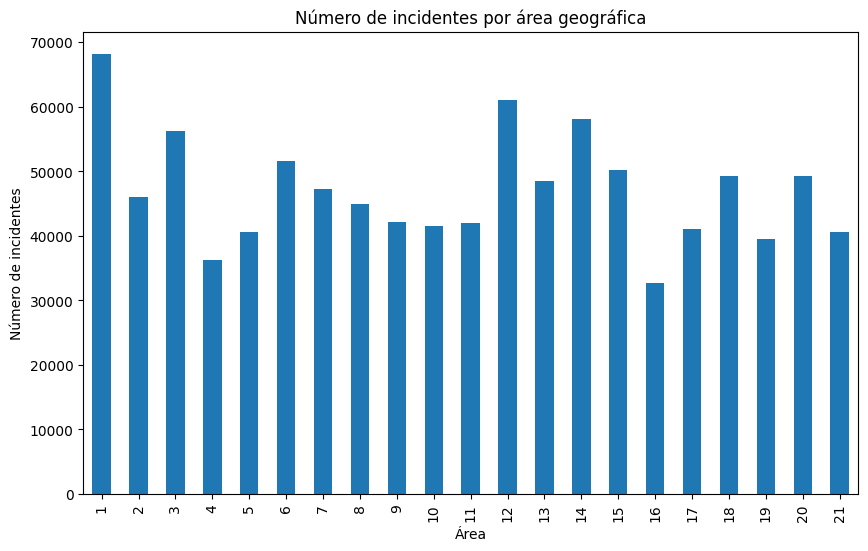

In [32]:
#Punto 5
import matplotlib.pyplot as plt
# Agrupar por área y contar el número de incidentes
incidentes_por_area = df.groupby('AREA').size()

# Crear el gráfico de barras
incidentes_por_area.plot(kind='bar', figsize=(10, 6))
plt.title('Número de incidentes por área geográfica')
plt.xlabel('Área')
plt.ylabel('Número de incidentes')
plt.show()

In [36]:
#Punto 6
import geopandas as gpd
from shapely.geometry import Point

# Crear una geometría de puntos a partir de latitudes y longitudes
df['geometry'] = df.apply(lambda row: Point(row['LON'], row['LAT']), axis=1)

# Convertir el dataframe de pandas en un GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')

# Cargar el mapa base de Los Ángeles (puedes utilizar un shapefile o un mapa base desde GeoPandas)
# Descargar el archivo con el enlace corregido
!wget https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip
world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Visualizar los puntos en el mapa
ax = world[world.name == 'United States'].plot(color='white', edgecolor='black')
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.show()

--2024-10-28 03:31:57--  https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip
Resolving www.naturalearthdata.com (www.naturalearthdata.com)... 50.87.253.14
Connecting to www.naturalearthdata.com (www.naturalearthdata.com)|50.87.253.14|:443... connected.
HTTP request sent, awaiting response... 500 Internal Server Error
2024-10-28 03:31:58 ERROR 500: Internal Server Error.

unzip:  cannot find or open ne_110m_admin_0_countries.zip, ne_110m_admin_0_countries.zip.zip or ne_110m_admin_0_countries.zip.ZIP.


DataSourceError: ne_110m_admin_0_countries.shp: No such file or directory

In [41]:
#Punto 7
# Convertir la columna 'DATE OCC' a tipo datetime
#df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%M/%D/%Y')
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %p', errors='coerce')
# Filtrar incidentes ocurridos entre el 01/01/2023 y el 31/03/2023
rango_fechas = (df['DATE OCC'] >= '2023-01-01') & (df['DATE OCC'] <= '2023-03-31')
incidentes_en_rango = df[rango_fechas]

# Mostrar los resultados
print(incidentes_en_rango.head())

            DR_NO               Date Rptd   DATE OCC  TIME OCC  AREA  \
644788  230106843  02/12/2023 12:00:00 AM 2023-02-11      1630     1   
644797  232005166  01/21/2023 12:00:00 AM 2023-01-21        40    20   
644798  230107118  02/13/2023 12:00:00 AM 2023-02-12      2100     1   
644808  231207867  03/03/2023 12:00:00 AM 2023-03-03      1000    12   
644811  240406619  03/27/2024 12:00:00 AM 2023-02-22      2359     4   

          AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
644788      Central          191         1     440   
644797      Olympic         2033         1     352   
644798      Central          191         1     341   
644808  77th Street         1258         2     354   
644811   Hollenbeck          468         2     740   

                                              Crm Cd Desc  ...  Status Desc  \
644788                 THEFT PLAIN - PETTY ($950 & UNDER)  ...  Invest Cont   
644797                                         PICKPOCKET  ...  Invest Cont   
64479

In [42]:
#Punto 8
armas_utilizadas = df['Weapon Used Cd'].value_counts()
print(armas_utilizadas)

Weapon Used Cd
400.0    174484
500.0     36010
511.0     23806
102.0     20123
109.0      7250
          ...  
120.0         3
121.0         2
119.0         2
124.0         2
123.0         1
Name: count, Length: 79, dtype: int64


In [43]:
#Punto 9
delitos_comunes = df['Crm Cd'].value_counts()

# Mostrar los 10 delitos más comunes
print(delitos_comunes.head(10))

Crm Cd
510    111632
624     74717
330     61633
354     61148
740     59848
310     57777
230     53422
440     51767
626     46701
420     39873
Name: count, dtype: int64


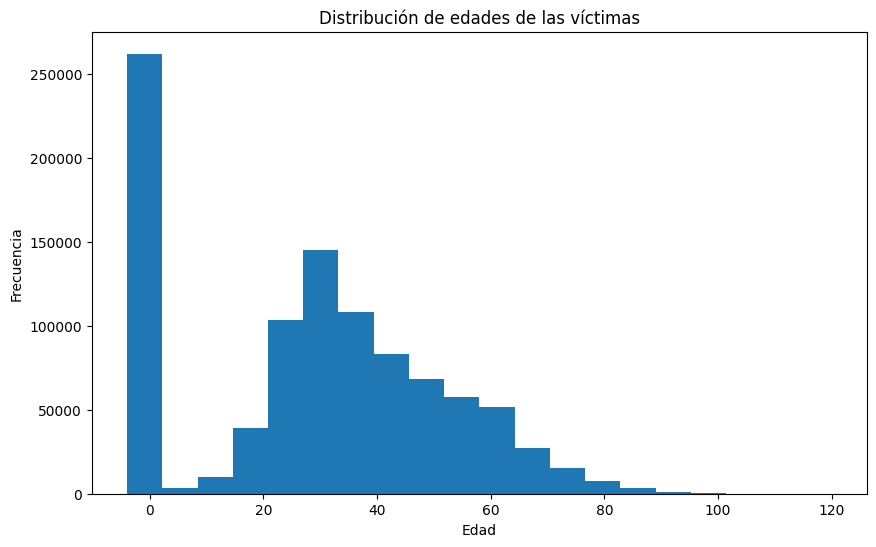

In [44]:
#Punto 10
df['Vict Age'] = pd.to_numeric(df['Vict Age'], errors='coerce')

# Visualizar la distribución de las edades con un histograma
df['Vict Age'].plot(kind='hist', bins=20, figsize=(10, 6))
plt.title('Distribución de edades de las víctimas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()
